<h1>Digit Recognizer </h1>
<p>The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples.Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. .

In [1]:

import sys
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.layers.core import Dense, Dropout, Activation
from keras.initializers import RandomNormal
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87,

<h1>Loading the Dataset</h1>
  <p>Mnist Dataset is present in keras library We will import the Data From there </p>

In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


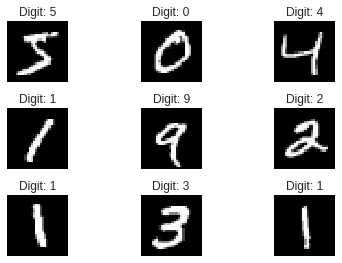

In [4]:

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])



In [0]:
#we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
print("Shape of X_train is",X_train.shape,"Shape of X_test is",X_test.shape)

Shape of X_train is (60000, 784) Shape of X_test is (10000, 784)


In [0]:
#Lets Normalize the data

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



  <h3>1. MLP Architecture<h3> Input Layer + Layer 1(512 neuron) + Layer 2 (512 neuron) + Output Layer</h3></h3>
  <b> For Activation Function We will Use Relu and we will fix dropout value 0.2 </b>
 

In [0]:


def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


model = Sequential()
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [11]:
X_train.shape[1]

784

In [0]:
# start building a model
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(512, input_shape=(784,)))#Layer_1
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(512))#LAyer_2
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

<h2> Understanding the Layer Architecture </h2>
<li>For Layer 1 (dense_1) number of params is 401920. This is obtained as : 784 (input values) * 512 (neurons in the first layer) + 512 (bias values)</li>
<li> For Layer 2(dense_2) number of params is 262656. This is obtained as: 512(output of 1st layer)*512 (neurons in the second layer) + 512 (bias values)</li>
<li>For Output Layer(dense_3) The number of parameters is 5130 because output of layer 2 is 512  weights and one weight of connection with bias. This means that we have 513 parameter and our output is of 10 class so we are getting 5130 parameter</li>


In [15]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.2158 - acc: 0.9336 - val_loss: 0.1098 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.1057 - acc: 0.9672 - val_loss: 0.0886 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0786 - acc: 0.9748 - val_loss: 0.0725 - val_acc: 0.9776
Epoch 4/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0666 - acc: 0.9788 - val_loss: 0.0682 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0577 - acc: 0.9814 - val_loss: 0.0739 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0498 - acc: 0.9841 - val_loss: 0.0733 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0443 - acc: 0.9856 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) #Returns the loss value & metrics values for the model in test mode.

In [17]:
score

[0.07174870396738807, 0.9835]

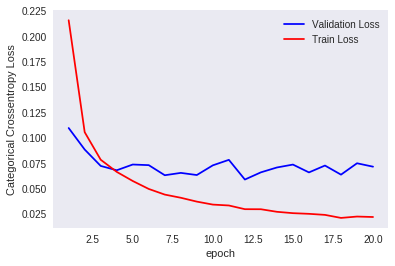

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


9835  classified correctly
165  classified incorrectly


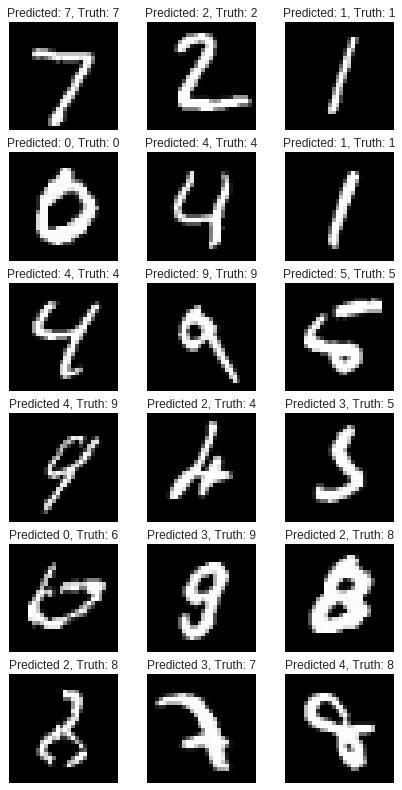

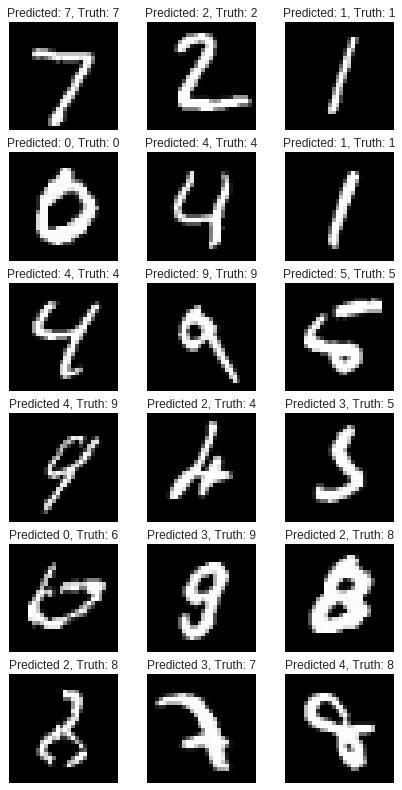

In [19]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

<h1>Conclusion:</h1>
<li>Out of 10,000  image 165 are incorrectly classified and 9835 are classifed correctly</li>
<li>We can see the image which are not classified correctly is not so clear </li>

<h3>2. MLP Architecture<h3> Input Layer + Layer 1(512 neuron) + Layer 2 (256 neuron) + Layer 3(128 neuron) + Output Layer</h3></h3>
  <b> For Activation Function We will Use Relu and we will fix dropout value 0.2 </b>

In [20]:
# start building a model
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(512, input_shape=(784,)))#Layer_1
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(256))#LAyer_2
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128))#LAyer_3
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

<h2> Understanding the Layer Architecture </h2>
<li>For Layer 1 (dense_4) no. of params is 401920. This is obtained as : 784 (input values) * 512 (neurons in the first layer) + 512 (bias values)</li>

<li> For Layer 2 (dense_5) no. of params is 131328. This is obtained as: 512(output of 1st layer)*256 (neurons in the second layer) + 256 (bias values)</li>

<li>For Layer 3 (dense_6)  no. of params is 32896. This is obtained as: 256(output of 2nd Layer)*128(neurons in third layer ) + 128 (bias values) </li>

<li>For Output Layer(dense_7) The number of parameters is 1290 because output of layer 3 is 128  weights and one weight of connection with bias. This means that we have 129 parameter and our output is of 10 class so we are getting 1290 parameter</li>


In [21]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.2959 - acc: 0.9098 - val_loss: 0.1513 - val_acc: 0.9514
Epoch 2/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.1312 - acc: 0.9599 - val_loss: 0.0862 - val_acc: 0.9728
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.1004 - acc: 0.9695 - val_loss: 0.0773 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.0795 - acc: 0.9753 - val_loss: 0.0672 - val_acc: 0.9789
Epoch 5/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0686 - acc: 0.9780 - val_loss: 0.0710 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.0554 - acc: 0.9826 - val_loss: 0.0691 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0520 - acc: 0.9836 - val_loss: 0.

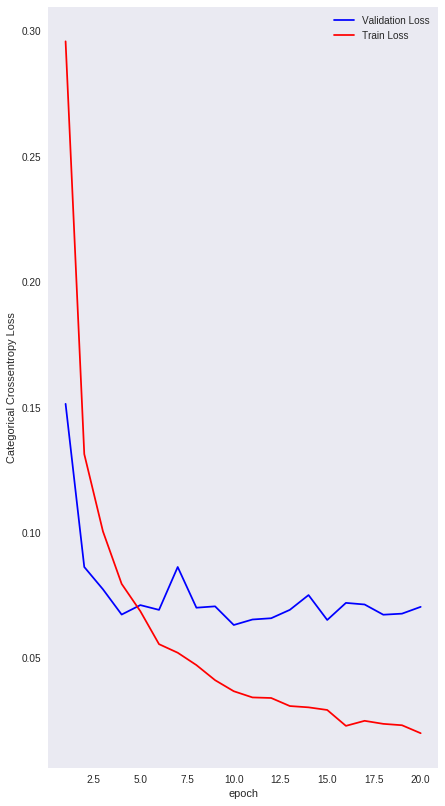

In [22]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


9829  classified correctly
171  classified incorrectly


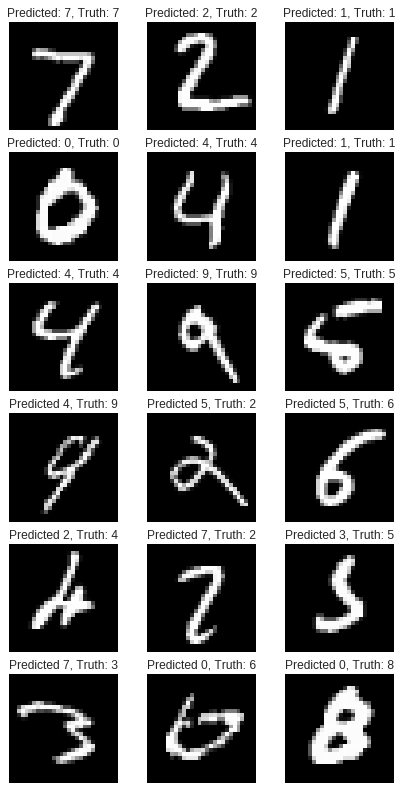

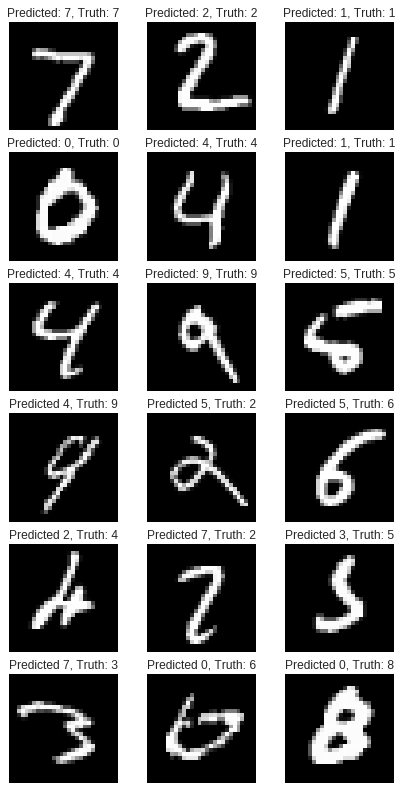

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0) 
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation


<li>Out of 10,000 image  171 are incorrectly classified and 9829 are classifed correctly</li>

<h3>3. MLP Architecture<h3> Input Layer + Layer 1(512 neuron) + Layer 2 (342 neuron) + Layer 3(228 neuron)  + Layer 4( 152 neuron) + Layer 5(96 neuron )+ Output Layer</h3></h3>
  <b> For Activation Function We will Use Relu and we will fix dropout value 0.2 </b>

In [24]:
# start building a model
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(512, input_shape=(784,)))#Layer_1
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(342))#LAyer_2
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(228))#LAyer_3
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(152))#LAyer_4
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(96))#LAyer_4
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 342)               175446    
_________________________________________________________________
activation_9 (Activation)    (None, 342)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 342)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 342)               1368      
__________

<h2> Understanding the Layer Architecture </h2>
<li>For Layer 1 (dense_8) no. of params is 401920. This is obtained as : 784 (input values) * 512 (neurons in the first layer) + 512 (bias values)</li>

<li> For Layer 2 (dense_9) no. of params is 175446. This is obtained as: 512(output of 1st layer)*342 (neurons in the second layer) + 342 (bias values)</li>

<li>For Layer 3 (dense_10)  no. of params is 78204. This is obtained as: 342(output of 2nd Layer)*228(neurons in third layer ) + 228 (bias values) </li>

<li>For Layer 4 (dense_11)  no. of params is 34808. This is obtained as: 228(output of 3rd Layer)*152(neurons in fourth layer ) + 152 (bias values) </li>

<li>For Layer 5 (dense_12)  no. of params is 14688. This is obtained as: 152(output of 4th Layer)*96(neurons in fifth layer ) + 96 (bias values) </li>

<li>For Output Layer(dense_13) The number of parameters is 970 because output of layer 5 is 96  weights and one weight of connection with bias. This means that we have 97 parameter and our output is of 10 class so we are getting 970 parameter</li>


In [25]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.3974 - acc: 0.8782 - val_loss: 0.1248 - val_acc: 0.9622
Epoch 2/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.1669 - acc: 0.9525 - val_loss: 0.0982 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.1199 - acc: 0.9651 - val_loss: 0.0778 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0986 - acc: 0.9711 - val_loss: 0.0890 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.0850 - acc: 0.9753 - val_loss: 0.0885 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0749 - acc: 0.9779 - val_loss: 0.0740 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.

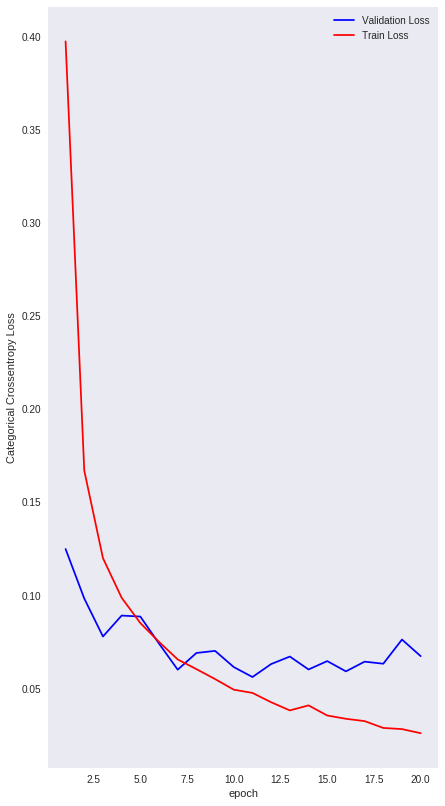

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


9845  classified correctly
155  classified incorrectly


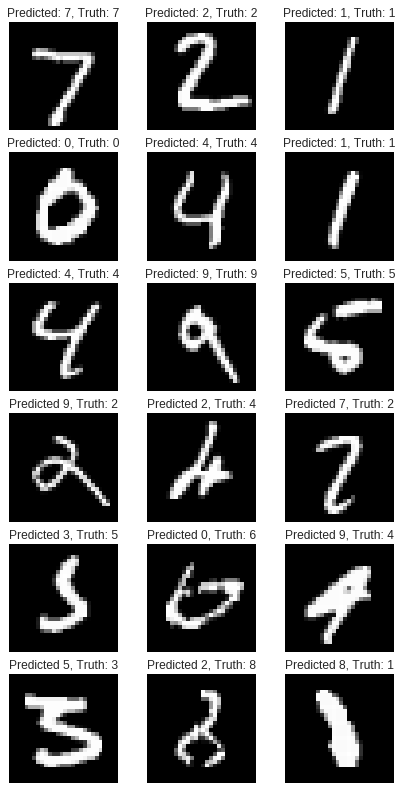

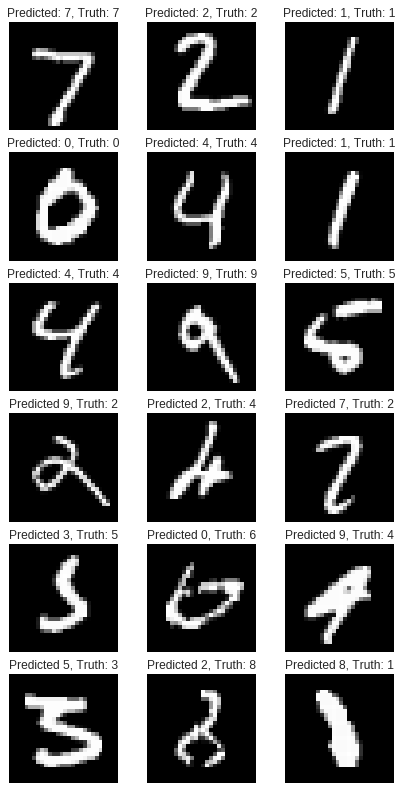

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0) 
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation


<li>Out of 10,000  image 155 are incorrectly classified and 9845 are classifed correctly</li>